# Advanced Practices<br>
We covered the very basics of the Machine Learning pipeline, but in this section, we'll cover some of the more advanced practices when it comes to preprocessing your data, making your model better and at the end, we'll introduce some new evaluation techniques and metrics.<br>
We'll be using the same dataset as before.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/churn.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Preprocessing

In [3]:
d = {'yes':1, 'no':0}

df['Int\'l Plan'] = df['Int\'l Plan'].map(d)
df['VMail Plan'] = df['VMail Plan'].map(d)
df['Churn?'] = df['Churn?'].astype('int64')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
df.set_index(['Phone'], inplace=True, drop=True)
df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
Phone,,,,,,,,,,,,,,,,,,,,
382-4657,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
371-7191,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
358-1921,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
375-9999,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
330-6626,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


That'd be all we did before, but last time we just dropped our features `State` and `Area Code` because they had more than  two classes. Now we're going to present the three most common methods of handling such data.<br><br>
Categorical features can be ordinal and nominal. Ordinal features are those that can be ordered in some way that makes sense. Level of education is a great example since we can order elementary schools, high schools and universities as 0, 1 and 2. Two is certainly bigger than 0, which would mean universities are 'better' than elementary schools.<br>
Nominal features are those that can't be ordered. Here an example could be the colour of someone's eyes. Green eyes shouldn't be better than brown ones (although they are prettier).<br><br>
In our case both of the features above mentioned are nominal so in order to show you how ordinal feature preprocessing works, we'll create a new feature same as `Area Code` but representing the level of education. To do so, we'll use `LabelEncoder` class from `sklearn` library.

In [5]:
d1 = {408: 'Elementary School', 415: 'High School', 510: 'University'}

df['Education Level'] = df['Area Code'].map(d1)
df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Education Level
Phone,,,,,,,,,,,,,,,,,,,,,
382-4657,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,High School
371-7191,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,High School
358-1921,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,High School
375-9999,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,Elementary School
330-6626,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,High School


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Education Level'] = le.fit_transform(df['Education Level'])
df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Education Level
Phone,,,,,,,,,,,,,,,,,,,,,
382-4657,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
371-7191,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
358-1921,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1
375-9999,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
330-6626,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1


As can be seen, values have been transformed into 0, 1 and 2 corresponding to the education level.<br><br>
Ordinal features ,on the other hand, have their preprocessing class in `sklearn` library called `OneHotEncoder`, but also in `pandas` with function `get_dummies`. They both transform each <b>value</b> of the categorical feature, into a <b>new feature</b> and then represents those new features with 0 or 1, based on the fact that that instance had or didn't have that value.

In [7]:
df = pd.get_dummies(data=df, columns=['State'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 382-4657 to 400-4344
Data columns (total 71 columns):
Account Length     3333 non-null int64
Area Code          3333 non-null int64
Int'l Plan         3333 non-null int64
VMail Plan         3333 non-null int64
VMail Message      3333 non-null int64
Day Mins           3333 non-null float64
Day Calls          3333 non-null int64
Day Charge         3333 non-null float64
Eve Mins           3333 non-null float64
Eve Calls          3333 non-null int64
Eve Charge         3333 non-null float64
Night Mins         3333 non-null float64
Night Calls        3333 non-null int64
Night Charge       3333 non-null float64
Intl Mins          3333 non-null float64
Intl Calls         3333 non-null int64
Intl Charge        3333 non-null float64
CustServ Calls     3333 non-null int64
Churn?             3333 non-null int64
Education Level    3333 non-null int64
State_AK           3333 non-null uint8
State_AL           3333 non-null uint8
State_AR     

One thing we need to be aware of is <a href='https://www.algosome.com/articles/dummy-variable-trap-regression.html'>dummy variable trap</a>. That's a scenario where those newly created features are highly correlated and in order for them not to render our model useless, we need to drop one feature.

In [8]:
df.drop(['State_WY'], axis=1, inplace=True)
df.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,...,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV
Phone,,,,,,,,,,,,,,,,,,,,,
382-4657,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
371-7191,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
358-1921,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
375-9999,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
330-6626,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


Now only remains `Area Code` feature. Let's show how `OneHotEncoder` works. To work with `OneHotEncoder`, we need to separate our dataset into X and y, that is we need to separate the target feature.

In [9]:
from sklearn.preprocessing import OneHotEncoder

y = df['Churn?']
X = df.iloc[:, df.columns != 'Churn?']

ohe = OneHotEncoder(categorical_features=[1])
X_ohe = ohe.fit_transform(X).toarray()

/home/stopwolf/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [10]:
X_ohe.shape, X.shape

((3333, 71), (3333, 69))

We can see that the `X`'s area code was transformed into 3 new features, which is why `X_ohe` has 2 features more.

## Cross-Validation<br>
When we use train/test split, we may have a very lucky split, resulting in higher scores than usual. In order to prevent that, we can use <b>cross-validation</b>. But what is that?<br><br>
Cross-validation is an approach to training a model. Imagine we split our dataset into 5 parts and using 4 parts for training and one for testing. We can do that for every part, resulting in 5 different 'models'. That can easily be seen from the picture below:<br>
<img src='img/cross_validation.png'><br>
As always, there's a class in `sklearn` library called `cross_val_score`, which performs the explained process. We'll split our data into train and test and use the train set for cross-validation. In this case, as you might remember, test set actually represents a test set instead of a validation set. Also, we'll use cross-validation on a Logistic Regression model.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.25, random_state=51)
model = LogisticRegression()

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

array([0.85258964, 0.87649402, 0.85657371, 0.844     , 0.852     ,
       0.876     , 0.85542169, 0.84738956, 0.8875502 , 0.87951807])

Some of the parameters of cross-validation are `cv` which represents how many parts is our dataset going to be split; and `scoring` which represents a metric we're using to evaluate our model.<br>
We don't use the best score we got in the cross-validation process, but we take mean value.

In [13]:
cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8627536888590217

If we wanted to use more than one evaluation metric, we would need to use `cross_validate` method instead of `cross_val_score`.

In [14]:
from sklearn.model_selection import cross_validate

cross_validate(model, X_train, y_train, cv=10, scoring=['accuracy', 'precision', 'recall'])

{'fit_time': array([0.07114363, 0.06220436, 0.05850673, 0.05868578, 0.05647707,
        0.04882264, 0.0602212 , 0.06423855, 0.06820798, 0.06032228]),
 'score_time': array([0.00292969, 0.00292087, 0.0029211 , 0.00289369, 0.00285482,
        0.00286841, 0.00283289, 0.00283241, 0.00290799, 0.00281382]),
 'test_accuracy': array([0.85258964, 0.87649402, 0.85657371, 0.844     , 0.852     ,
        0.876     , 0.85542169, 0.84738956, 0.8875502 , 0.87951807]),
 'train_accuracy': array([0.8727758 , 0.8705516 , 0.87099644, 0.87016452, 0.87238773,
        0.86971988, 0.86977778, 0.86933333, 0.86444444, 0.87066667]),
 'test_precision': array([0.5       , 0.71428571, 0.52941176, 0.4       , 0.47058824,
        0.66666667, 0.5       , 0.4375    , 0.78571429, 0.71428571]),
 'train_precision': array([0.65384615, 0.64957265, 0.64754098, 0.64227642, 0.65873016,
        0.63709677, 0.6328125 , 0.63636364, 0.59322034, 0.64754098]),
 'test_recall': array([0.08108108, 0.27027027, 0.24324324, 0.16666667, 0.2

## Parameter Tuning<br>
To make our models better, we can tune their hyperparameters. <b>Hyperparameters</b> are parameters the model uses, which can be set directly by us. <b>Parameters</b>, on the other hand, are internal and cannot be set by us.<br>
For hyperparameter tuning, we use `GridSearchCV` algorithm which tries out all combinations of hyperparameters we provide it.<br><br>
Some of the parameters Logistic Regression has are:<br>
<ul><li>penalty - represents thr type of the regularization used in training of the model</li>
    <li>C - affects the strength of the regularization</li></ul><br>
We can also see that Grid Search uses cross-validation.

In [18]:
from sklearn.model_selection import GridSearchCV

params_C = [0.01, 0.1, 1]
params_p = ['l1', 'l2']
params_max_iter = [100, 250, 500]

params = [{'C':  params_C, 'penalty': params_p, 'max_iter': params_max_iter}]

grid = GridSearchCV(model, params, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'], 'max_iter': [100, 250, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In order to find which combination of the hyperparameters is the best one and the score it got we can do the following:

In [20]:
grid.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [21]:
grid.best_score_

0.8627450980392157

## Evaluation Techniques and Metrics<br>
When we train Logistic Regression for an example, as a result, we don't get ones and zeroes. We get probabilities and then we say if the probability is higher than a certain threshold, it belongs to class 1, otherwise class 0. By default, that threshold is 0.5. That means our confusion matrix should look like this:<br>
<img src='img/confusion_matrix_dt.png'><br>
What if that threshold is different? Could we get better predictions?<br><br>
Absolutely yes! Changing the threshold affects confusion matrix in the following ways:<br>
1. If we lower the threshold, we should have more TP and FP values, but also less TN and FN values. Practically, that would mean that we are more confident our clients won't be churning. In other words, when our model says the client didn't churn, we are more confident about that outcome.<br>
<img src='img/confusion_matrix_4.png'><br>
2. We can also increase the threshold, which results in the increase of the FN and TN values and decrease of the TP and FP values. When our model says client churned, we're more confident about that outcome.<br>
<img src='img/confusion_matrix_3.png'><br>
That can be seen from the bellow two examples of confusion matrices.

In [23]:
from sklearn.metrics import confusion_matrix

model.fit(X_train, y_train)
y_hat = model.predict_proba(X_test)[:, 1] >= 0.2

confusion_matrix(y_test, y_hat)

array([[594, 120],
       [ 49,  71]])

In [26]:
y_hat = model.predict_proba(X_test)[:, 1] >= 0.8

confusion_matrix(y_test, y_hat)

array([[711,   3],
       [116,   4]])

But why is this important? Because using the appropriate threshold, we can optimize either precision or recall score - depending on which one is more important for our problem.<br><br>
In our churning problem, we need to watch out for the `False Negative` values, which mean we need to optimize recall score.

In [28]:
from sklearn.metrics import recall_score

y_hat = model.predict(X_test) #threshold 0.5
y_hat_down = model.predict_proba(X_test)[:, 1] >= 0.2 #threshold 0.2
y_hat_up = model.predict_proba(X_test)[:, 1] >= 0.8 #threshold 0.8

print(f'Recall score for threshold 0.5 is {recall_score(y_test, y_hat)}')
print(f'Recall score for threshold 0.8 is {recall_score(y_test, y_hat_up)}')
print(f'Recall score for threshold 0.2 is {recall_score(y_test, y_hat_down)}')

Recall score for threshold 0.5 is 0.20833333333333334
Recall score for threshold 0.8 is 0.03333333333333333
Recall score for threshold 0.2 is 0.5916666666666667


<b>ROC AUC Score</b><br><br>
Since the usual case is that our target is imbalanced (we don't have equal amounts of target classes), our usual metric `accuracy` isn't viable. `Precision` and `recall`, on the other hand, can be manipulated to be 100%! (How? The answer is above) In order to avoid that, we can use the <b>ROC AUC score</b>.<br><br>
Receiver operating characteristic curve is a curve that is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. TPR is actually recall score which is given by $\frac{TP}{TP+FN}$ and FPR is given by formula $\frac{FP}{TN+FP}$.<br>
AUC is short for Area Under the ROC Curve and represents the actual metric we're going to use to evaluate our models.

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

0.8446621475222088

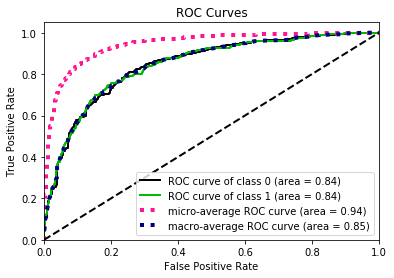

In [40]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_train, model.predict_proba(X_train))

How can we interpret this plot?<br>
True Positive Rate is the percentage of identified churning clients, and False Positive Rate is the rate of false alarms. From the above plot, if we want to identify 80% of churning clients, we'll falsely alarm ~25% of non-churning clients.<br><br>
Our goal is for our model to have 100% of identified churning clients without any false alarms. On the other hand, the worst possible model can have a 0.500 ROC AUC score, which is the equivalent to random guessing.<br><br>
We can also use cross-validation with ROC AUC score.

In [42]:
cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean()

0.8034931304873387